# Project description

**The task is to boost revenues for a major online store** by prioritizing hypotheses, launching an A/B test, and comprehensive result analysis.


## Description of the data

**Data used in the first part of the project:** 

file: **hypotheses_us.csv**:  
- `Hypotheses` — brief descriptions of the hypotheses  
- `Reach` — user reach, on a scale of one to ten  
- `Impact` — impact on users, on a scale of one to ten  
- `Confidence` — confidence in the hypothesis, on a scale of one to ten  
- `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.  

<br>

**Data used in the second part of the project:**

file: **orders_us.csv**
- `transactionId` — order identifier
- `visitorId` — identifier of the user who placed the order
- `date` — of the order
- `revenue` — from the order
- `group` — the A/B test group that the user belongs to

file: **datasets/visits_us.csv**
- `date` — date
- `group` — A/B test group
- `visits` — the number of visits on the date specified in the A/B test group specified

# Downloading the data and preparing it for analysis


## Initialization

In [215]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable as stb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import datetime as dt
from datetime import timedelta

# printing more than 1 output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# making possible to display all columns/rows in output
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

## Loading the data

In [7]:
# Load the data
try:    
    hypotheses_df = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\8. AB\datasets\hypotheses_us.csv', sep=';')
    orders_df = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\8. AB\datasets\orders_us.csv')
    visits_df = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\8. AB\datasets\visits_us.csv')

except:
    hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv')
    orders_df = pd.read_csv('/datasets/orders_us.csv')
    visits_df = pd.read_csv('/datasets/visits_us.csv')
    
# setting the names to our dataframes so we can refer to them later on     
hypotheses_df.name = 'hypotheses_df'   
orders_df.name = 'orders_df'
visits_df.name = 'visits_df'

Since we have several interconnected dataframes it looks reasonable to create a unified approach for checking them. For each dataframe we will study its' concise summary, overview - top rows, descriptive statistics, missing values and duplicates if any. Then we will address our findings.

## Studying the data

In [10]:
data = [hypotheses_df, orders_df, visits_df]

In [11]:
for df in data:
    print(f'\n Concise summary: {df.name}') 
    df.info(memory_usage='deep') # In order to find the exact size of the data, we add the parameter memory_usage='deep'
    print(f'\n Top rows: {df.name}') 
    df.head(5)
    print(f'\n Descriptive statistics: {df.name}') 
    df.describe()
    print(f'\n Missing values: {df.name}') 
    df.stb.missing(style=True)
    print(f'\n Number of duplicates: {df.name}')
    df.duplicated().sum()
    print('Share of duplicates:', round(df.duplicated().mean(), 2), '%')
    print('-'*26)
    print('Duplicates:')
    print(df[df.duplicated()].head(10))
    print('\n','*'*70)


 Concise summary: hypotheses_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB

 Top rows: hypotheses_df


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1



 Descriptive statistics: hypotheses_df


,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



 Missing values: hypotheses_df


,missing,total,percent
Hypothesis,0,9,0.00%
Reach,0,9,0.00%
Impact,0,9,0.00%
Confidence,0,9,0.00%
Effort,0,9,0.00%



 Number of duplicates: hypotheses_df


0

Share of duplicates: 0.0 %
--------------------------
Duplicates:
Empty DataFrame
Columns: [Hypothesis, Reach, Impact, Confidence, Effort]
Index: []

 **********************************************************************

 Concise summary: orders_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB

 Top rows: orders_df


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



 Descriptive statistics: orders_df


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000



 Missing values: orders_df


,missing,total,percent
transactionId,0,"1,197",0.00%
visitorId,0,"1,197",0.00%
date,0,"1,197",0.00%
revenue,0,"1,197",0.00%
group,0,"1,197",0.00%



 Number of duplicates: orders_df


0

Share of duplicates: 0.0 %
--------------------------
Duplicates:
Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []

 **********************************************************************

 Concise summary: visits_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB

 Top rows: visits_df


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



 Descriptive statistics: visits_df


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



 Missing values: visits_df


,missing,total,percent
date,0,62,0.00%
group,0,62,0.00%
visits,0,62,0.00%



 Number of duplicates: visits_df


0

Share of duplicates: 0.0 %
--------------------------
Duplicates:
Empty DataFrame
Columns: [date, group, visits]
Index: []

 **********************************************************************


### Observations
- data we see matches the Projects' description.
- no full duplicates revealed
- no missing values revealed
- the names of some columns are written not according to the "snake_case" format 
- significant memory usage in orders_df - we can fix it by adjusting the data type of "group" column (from "object" to "category")

## Preparing the data

In [14]:
# addressing the observations
hypotheses_df.columns = hypotheses_df.columns.str.lower()
orders_df = orders_df.rename(columns={'visitorId': 'visitor_id', 'transactionId': 'transaction_id'})

orders_df['group'] = orders_df['group'].astype('category')
visits_df['group'] = visits_df['group'].astype('category')

orders_df['date'] = pd.to_datetime(orders_df['date'] ,format="%Y-%m-%d")
visits_df['date'] = pd.to_datetime(visits_df['date'] ,format="%Y-%m-%d")

In [15]:
# checking result
print('hypotheses_df columns:', hypotheses_df.columns, '\n')

print('orders_df:')
print(orders_df.info(memory_usage='deep'), '\n')

print('visits_df:')
visits_df.info()

hypotheses_df columns: Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object') 

orders_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB
None 

visits_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64

In [16]:
# checking if there are users that present in both A and B groups
visitors_in_both_groups = orders_df.groupby('visitor_id', as_index=False)['group']\
                                   .nunique().query('group > 1')
        
print('Number of users that are present in both A and B groups:', len(visitors_in_both_groups))

Number of users that are present in both A and B groups: 58


In [17]:
# getting rid of duplicated visitors
orders_cleaned_df = orders_df[~orders_df['visitor_id']
                          .isin(visitors_in_both_groups['visitor_id'])]

In [18]:
# checking result
print('Original size:', orders_df.shape[0])
print('Size without duplicated visitors:', orders_cleaned_df.shape[0])
print(
    'Share of data to be deleted :', 
    round(len(visitors_in_both_groups)/orders_df.shape[0]*100, 1),
    '%'
)

Original size: 1197
Size without duplicated visitors: 1016
Share of data to be deleted : 4.8 %


In [19]:
# getting rid of rows with duplicated visitors
orders_df = orders_cleaned_df

In [20]:
# checking result
orders_df.shape[0]

1016

### Summary on data preprocessing
- we addressed our observations (data types, formats of names)
- we found that there are users present in both A and B groups in orders_df (most likely that happened due to shortcomings in data collection). These duplicated visitors could affect our analysis so we got rid of them. 

# Prioritizing Hypotheses

## ICE framework to prioritize hypotheses

Let's recollect that ICE stands for Impact, Confidence, Effort (or Ease).
>The formula is: **ICE score = Impact * Confidence / Effort**

In [25]:
# calculating ICE score
hypotheses_df['ICE'] = (
    hypotheses_df['impact'] 
    * hypotheses_df['confidence'] 
    / hypotheses_df['effort']
)
hypotheses_df['ICE'] = round(hypotheses_df['ICE'], 1)

In [26]:
ICE = hypotheses_df[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
ICE.head(5)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,7.0


## RICE framework to prioritize hypotheses

Let's recollect that RICE stands for Reach, Impact, Confidence, Effort (or Ease).
>The formula is: **ICE score = Reach * Impact * Confidence / Effort**

In [29]:
# calculating RICE score
hypotheses_df['RICE'] = (
    hypotheses_df['reach'] 
    * hypotheses_df['impact'] 
    * hypotheses_df['confidence'] 
    / hypotheses_df['effort']
)
hypotheses_df['RICE'] = round(hypotheses_df['RICE'], 1)

In [30]:
RICE = hypotheses_df[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)
RICE.head(5)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2


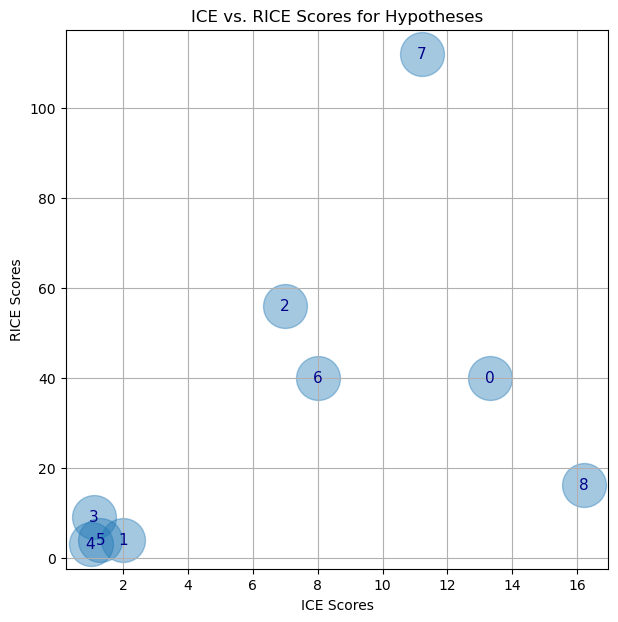

In [31]:
# create a scatter plot for ICE and RICE scores
plt.figure(figsize=(7, 7))
plt.scatter(hypotheses_df['ICE'], hypotheses_df['RICE'], s=1000, alpha=0.4)

# add text labels for each hypothesis index
for i in hypotheses_df.index:
    ice_score = hypotheses_df['ICE'].iloc[i]
    rice_score = hypotheses_df['RICE'].iloc[i]
    plt.text(ice_score, rice_score+0, str(i), ha='center', va='center', fontsize=11, color='darkblue')

plt.xlabel('ICE Scores')
plt.ylabel('RICE Scores')
plt.title('ICE vs. RICE Scores for Hypotheses')
plt.grid(True);

### Observations
The top 5 hypotheses align in both ICE and RICE frameworks, but their prioritization differs due to the significant impact of the 'reach' factor.

For example, hypothesis №8, "Launch a promotion that gives users discounts on their birthdays", is the highest in ICE due to its impact and confidence. However, considering its relatively small reach in RICE, it loses priority.

The 'reach' factor plays a crucial role in prioritization, as hypotheses with high impact and confidence may not be top priorities if their potential reach is limited. RICE ensures a more balanced approach by factoring in the reach metric.

The scatter plot visualizes the priorities for both ICE and RICE frameworks, showing that **hypotheses №7, 0, and 8 are top priorities in both methods. Among them, hypothesis №7 stands out as the most attractive choice**. It ranks in the top 3 for both frameworks and has the highest reach effect, which serves as a multiplier of its impact and potential value/revenues.

# A/B Test Analysis

**Let's observe our tasks in this part of the project**

1. Graph cumulative revenue by group.
1. Graph cumulative average order size by group.
1. Graph the relative difference in cumulative average order size for group B compared with group A. 
1. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. 
1. Plot a scatter chart of the number of orders per user. 
1. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
1. Plot a scatter chart of order prices. 
1. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
1. Find the statistical significance of the difference in conversion between the groups using the raw data. 
1. Find the statistical significance of the difference in average order size between the groups using the raw data. 
1. Find the statistical significance of the difference in conversion between the groups using the filtered data. 
1. Find the statistical significance of the difference in average order size between the groups using the filtered data. 
1. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

### 1. Graph cumulative revenue by group.

In [36]:
# building an array with unique paired date-group values 
dates_groups = orders_cleaned_df[['date','group']].drop_duplicates()
dates_groups.sample(5)

,date,group
769,2019-08-21,A
581,2019-08-07,B
298,2019-08-24,B
789,2019-08-08,B
540,2019-08-20,A


In [37]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [38]:
# converting 'group' columns  into ordered categorical variable, allowing use operations like max() without encountering the TypeError.
# the .cat.categories attribute returns the unique values of the categorical data as an Index object.

orders_df['group'] = pd.Categorical(orders_df['group'], categories=orders_df['group'].cat.categories, ordered=True)
visits_df['group'] = pd.Categorical(visits_df['group'], categories=visits_df['group'].cat.categories, ordered=True)

In [39]:
# Getting aggregated cumulative daily data on orders. 
# With this code, it's as if we've been calculating the results of our test every day up to the current date 
# and storing them in the rows of the orders_aggregated table

orders_aggregated = dates_groups.apply(
    lambda x: orders_df[
        np.logical_and(            
            orders_df['date'] <= x['date'], # the rows of the orders_cleaned_df where the date is less than or equal to the date of the dates_groups element
            orders_df['group'] == x['group'] # the test group is the same as in dates_groups
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [40]:
orders_aggregated.head(6)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
383,2019-08-03,B,54,53,4606.9


In [41]:
# Getting aggregated cumulative daily data on visitors. 
visitorsAggregated = dates_groups.apply(
    lambda x: visits_df[
        np.logical_and(            
            visits_df['date'] <= x['date'], # the rows of the visits_df where the date is less than or equal to the date of the dates_groups element
            visits_df['group'] == x['group'] # the test group is the same as in dates_groups
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visits' : 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [42]:
visitorsAggregated.head(6)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


In [43]:
# merging the two tables into one and giving its columns descriptive names
cumulative_data = orders_aggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [44]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [45]:
# dataframe with cumulative orders and cumulative revenue by day, group A
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# dataframe with cumulative orders and cumulative revenue by day, group B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

In [46]:
# checking result
cumulative_revenue_a.head(3)
cumulative_revenue_b.head(3)

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66


,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54


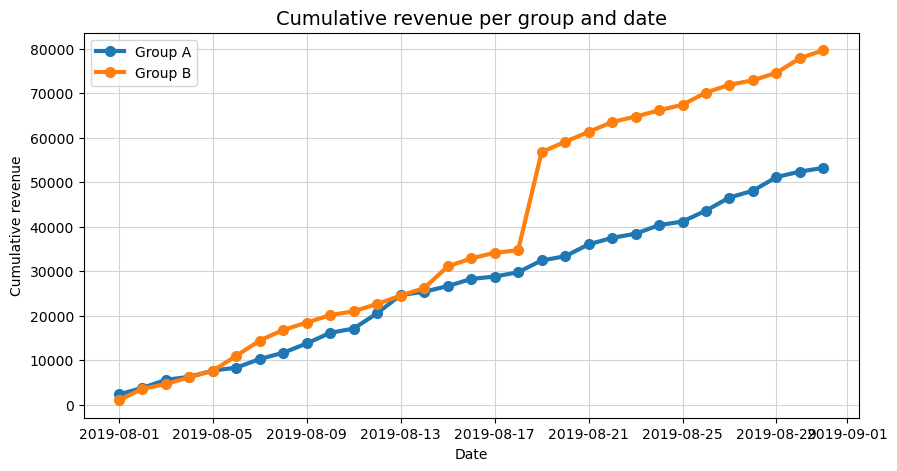

In [47]:
# plotting cumulative revenue graphs by day and A/B test group

plt.figure(figsize=(10, 5))
plt.title('Cumulative revenue per group and date',fontsize=14)

# Plotting the group A revenue graph 
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], 
         linewidth=3, marker='o', markersize=7, label='Group A')

# Plotting the group B revenue graph 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], 
         linewidth=3, marker='o', markersize=7, label='Group B')
plt.grid(True, color='lightgray')

plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.legend();

In [48]:
# checking daily difference in revenues and numbers of orders per group 
cumulative_data['revenue_difference'] = cumulative_data['revenue'] - cumulative_data['revenue'].shift(2)
cumulative_data['orders_difference'] = cumulative_data['orders'] - cumulative_data['orders'].shift(2)

# filtering the period of boost in revenues of group B
cumulative_data.query('"2019-08-17" < date < "2019-08-21"')

,date,group,orders,buyers,revenue,visitors,revenue_difference,orders_difference
34,2019-08-18,A,278,264,29735.7,11127,965.6,13.0
35,2019-08-18,B,327,321,34684.7,11171,568.5,7.0
36,2019-08-19,A,299,283,32389.3,11629,2653.6,21.0
37,2019-08-19,B,348,341,56749.6,11658,22064.9,21.0
38,2019-08-20,A,309,293,33325.3,12204,936.0,10.0
39,2019-08-20,B,368,360,59074.2,12218,2324.6,20.0


In [49]:
# checking the peak daily growth of revenue in group B comparing to its average value
average_revenue_difference_b = cumulative_data[cumulative_data['group'] == 'B']['revenue_difference'].mean()
peak_revenue_difference_b = cumulative_data[(cumulative_data['group'] == 'B') & (cumulative_data['date'] == pd.to_datetime('2019-08-19'))]['revenue_difference'].sum()

print('average daily growth of revenue in group B:', int(average_revenue_difference_b))
print('the peak daily growth of revenue in group B on 2019-08-19:', int(peak_revenue_difference_b))
print('the peak to average ratio:', round(peak_revenue_difference_b / average_revenue_difference_b, 1))

average daily growth of revenue in group B: 2622
the peak daily growth of revenue in group B on 2019-08-19: 22064
the peak to average ratio: 8.4


In [50]:
# getting rid of columns that we don't need anymore 
cumulative_data.drop(['revenue_difference','orders_difference'], axis=1, inplace=True)

In [51]:
# checking result
cumulative_data.head(0)

,date,group,orders,buyers,revenue,visitors


- Until 2019-08-19 cumulative revenue growth is prity similar for both A and B test groups. At some points like 2019-08-05 and 2019-08-13 there are spikes in graphs. Despite the overall similarity in cumulative revenue growth, the B group shows a slight lead over the A group in terms of revenue generation. But in general they are comparable during this period.

- Since 2019-08-19, growth of B group is much higher. From this date onward, the revenue growth for the B group started to diverge and showed a significant increase compared to the A group.

- The increase in revenue growth for the B group on 2019-08-19 is attributed to specific, potentially large, and significant order(s) made on that day.

- Average purchase size of that day in group B is 8.4 times higher than the average order value across all dates in this group.

### 2. Graph cumulative average order size by group.

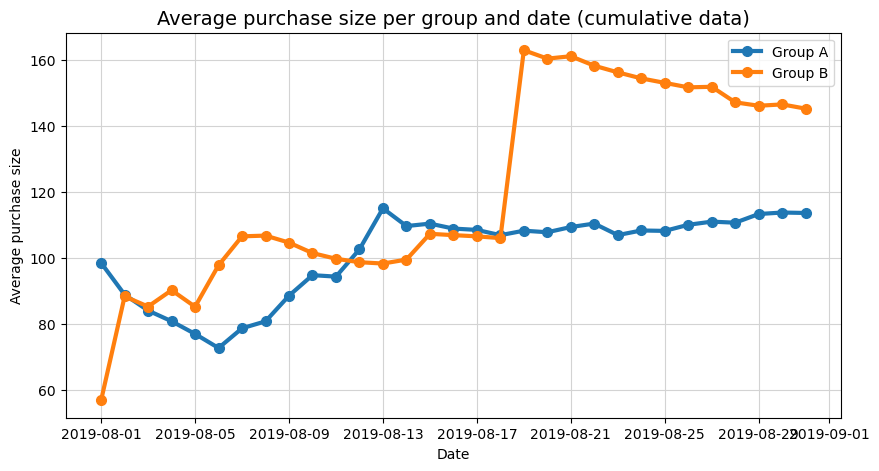

In [54]:
# plotting average purchase size by group. 

plt.figure(figsize=(10, 5))
plt.title('Average purchase size per group and date (cumulative data)',fontsize=14)

# Plotting the group A  average purchase size
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
         linewidth=3, marker='o', markersize=7, label='Group A')
plt.grid(True, color='lightgray')

# Plotting the group B average purchase size
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
         linewidth=3, marker='o', markersize=7, label='Group B')

plt.xlabel('Date')
plt.ylabel('Average purchase size')
plt.legend();

- In the second half of the test, the average purchase size shows a consistent pattern. 
- For group A, it remains relatively stable, while for group B, it continues to decline since 2019-08-21. 
- This decline is attributed to significant order(s) that occurred on this date in group B, as we previously uncovered.

### 3. Graph the relative difference in cumulative average order size for group B compared with group A. 

In [57]:
# gathering the data into one dataframe
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

merged_cumulative_revenue.head(3)

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54


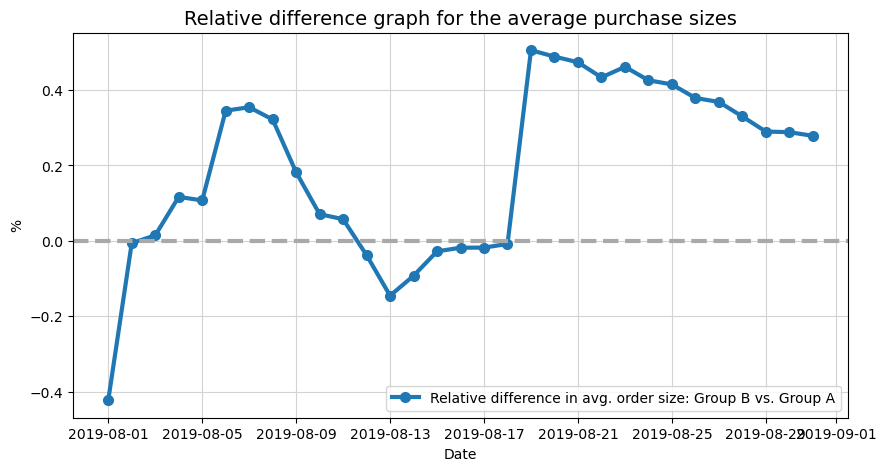

In [58]:
# plotting a relative difference graph for the average purchase sizes

plt.figure(figsize=(10, 5))
plt.title('Relative difference graph for the average purchase sizes', fontsize=14)

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])
         /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])
         -1
        , label='Relative difference in avg. order size: Group B vs. Group A',
        linewidth=3, marker='o', markersize=7)

plt.grid(True, color='lightgray')
plt.xlabel('Date')
plt.ylabel('%')

# adding the X axis
plt.axhline(y=0, color='darkgrey', linewidth=3, linestyle='--')
plt.legend(); 

At several points the difference between the segments spikes. This may be due to some major orders.

### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. 

In [61]:
# calculating cumulative conversion
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# selecting data on group A and B
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

In [62]:
# checking result
cumulative_data_a.head(3)
cumulative_data_b.head(3)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950


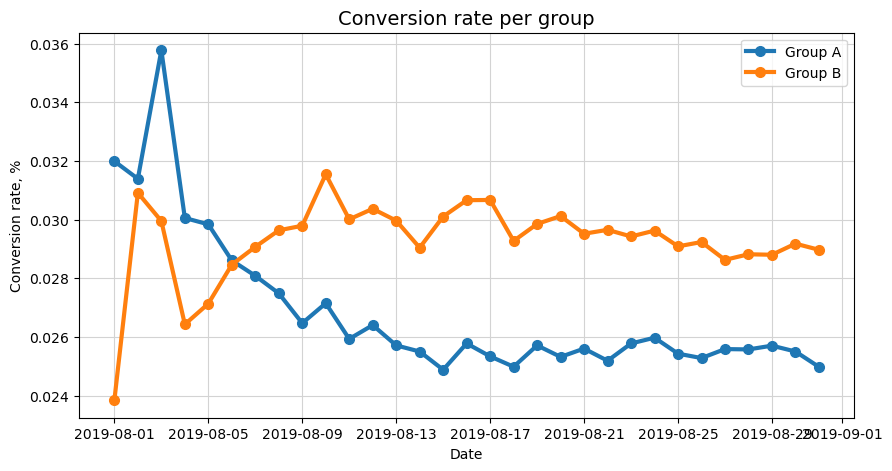

In [63]:
# Plotting a conversion rate graph for the average purchase sizes
plt.figure(figsize=(10, 5))
plt.title('Conversion rate per group',fontsize=14)

# Plotting the group A cumulative conversion
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], 
         linewidth=3, marker='o', markersize=7, label='Group A')
plt.grid(True, color='lightgray')

# Plotting the group B cumulative conversion
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], 
         linewidth=3, marker='o', markersize=7, label='Group B')

plt.xlabel('Date')
plt.ylabel('Conversion rate, %')
plt.legend();

- Group A initially held the lead in the conversion rate, but on 2019-08-07, Group B surpassed them. 
- Following this, both groups stabilized, with Group B maintaining an edge over Group A.
- Since the second week of August 2019, the conversation rates of both groups have been vaguely declining.

In [65]:
# merging data on conversions by groups
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

merged_cumulative_conversions.head(3)

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950


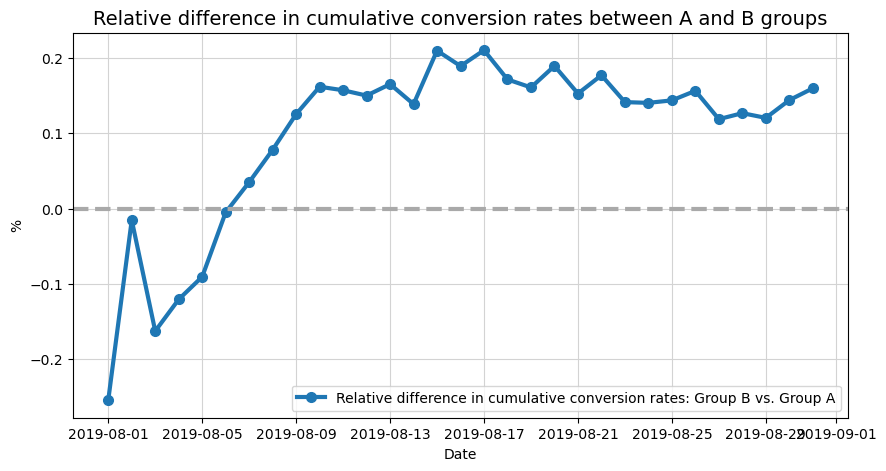

In [66]:
# Let's plot a relative difference graph for the cumulative conversion rates:

plt.figure(figsize=(10, 5))
plt.title('Relative difference in cumulative conversion rates between A and B groups',fontsize=14)

plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1, 
    label='Relative difference in cumulative conversion rates: Group B vs. Group A',
    linewidth=3, marker='o', markersize=7
) 

plt.grid(True, color='lightgray')
plt.legend()
plt.xlabel('Date')
plt.ylabel('%')

# adding the X axis
plt.axhline(y=0, color='darkgrey', linewidth=3, linestyle='--');

- At the start of the test, Group B was significantly behind Group A in terms of conversion rate. 
- However, it later surged ahead, and experienced another decline in conversion on 2019-08-03. 
- Since 2019-08-07 Group B is gradually showing improvement in comparison with group A.
- It's crucial to examine any anomalies, as they could potentially influence the results and change the overall outlook.

### 5. Plot a scatter chart of the number of orders per user. 

In [69]:
# creating a dataframe showing number of orders per user
orders_per_user = (
    orders_df.groupby('visitor_id',as_index=False)['transaction_id']
                   .nunique()
                  # .sort_values(by='transaction_id',ascending=False)
)
orders_per_user.columns = ['user','orders']

In [70]:
# checking result
orders_per_user.sample(3)

,user,orders
221,950626008,1
113,492739583,1
645,2803209166,1


In [71]:
orders_per_user.sort_values(by='orders')

,user,orders
0,5114589,1
636,2758621772,1
637,2761566146,1
638,2763027084,1
639,2771749575,1
...,...,...
138,611059232,3
908,3967698036,3
632,2742574263,3
890,3908431265,3


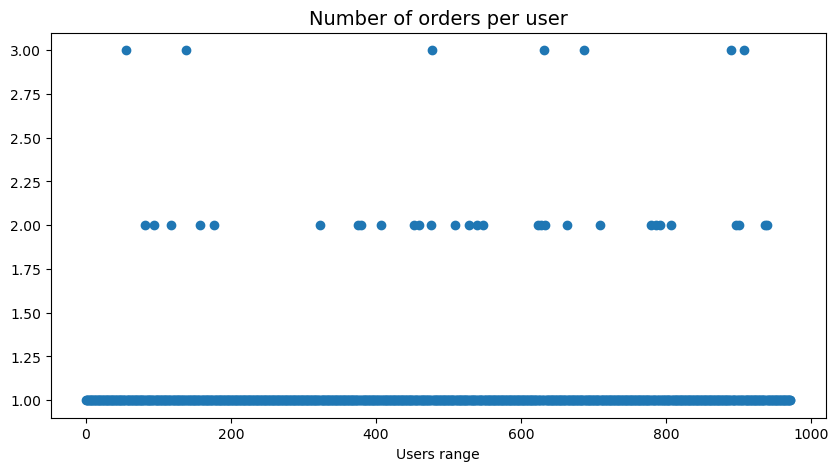

In [72]:
# plotting a scatter plot а the number of orders per user
plt.figure(figsize=(10, 5)) 
plt.title('Number of orders per user',fontsize=14)

x_values = pd.Series(range(0, len(orders_per_user)))
plt.scatter(x_values, orders_per_user['orders'])

plt.xlabel('Orders')
plt.xlabel('Users range');

In [73]:
# checking distribution of number of orders made by users 
orders_per_user_totals = orders_per_user['orders'].value_counts().reset_index()
orders_per_user_totals.columns = ['orders_per_user', 'sum']
orders_per_user_totals

,orders_per_user,sum
0,1,937
1,2,29
2,3,7


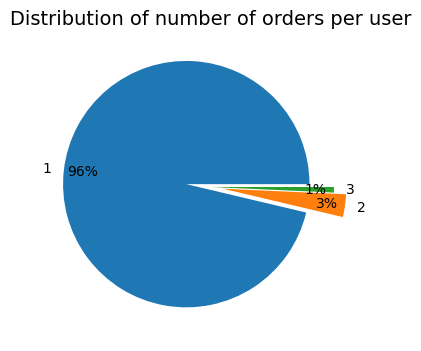

In [74]:
# let's display the distribution of number of orders per user on the pie-chart
plt.figure(figsize=(4, 4))
explode = [0.2, 0.1, 0]
plt.pie(data=orders_per_user_totals,
        x='sum',
        labels = 'orders_per_user',
        explode=explode,
        autopct='%.0f%%',
        pctdistance =0.85)
plt.title('Distribution of number of orders per user',fontsize=14); 

Just a minority - 4% of users made over one order.

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [77]:
# checking the 95 and 99 percentile
np.percentile(orders_per_user['orders'], [95, 99])

array([1., 2.])

- The nth percentile marks the value below which n percent of observations fall.
- So 95% percent of users made 1 or less orders, and 99% percent of users made 2 or less orders.

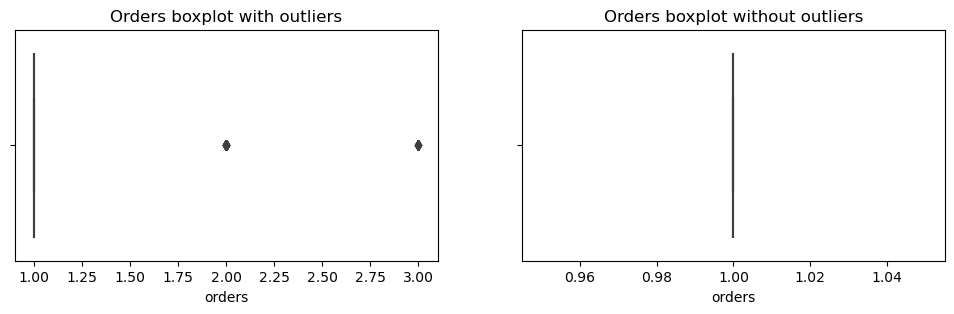

---------------------------------------
min border: 1
max border: 1
The outliers are considered to be values below 1 and above 1


In [79]:
# checking outliers with by use of "1.5*IQR approach" (whiskers of boxplot). 
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
x_data = orders_per_user['orders']
sns.boxplot(x=x_data, showfliers=True, ax=axes[0]).set(title='Orders boxplot with outliers')
sns.boxplot(x=x_data, showfliers=False, ax=axes[1]).set(title='Orders boxplot without outliers')
plt.show();
 
# calculating and displaying the IQR and outlier borders
Q1 = round(x_data.quantile(0.25))
Q3 = round(x_data.quantile(0.75))
IQR = Q3-Q1
min_iqr=Q1-round(1.5*IQR) 
max_iqr=Q3+round(1.5*IQR)

print('---------------------------------------')
print('min border:',min_iqr)
print('max border:',max_iqr)
print('The outliers are considered to be values below',min_iqr, "and above",max_iqr);

"1.5\*IQR approach" recommends us to treat all cases of making over 1 order per user as outliers.

### 7. Plot a scatter chart of order prices.

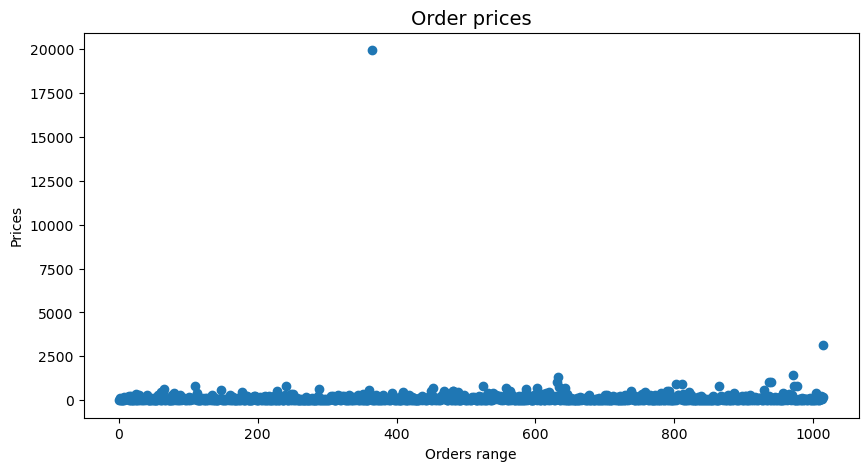

In [82]:
# plotting a scatter plot а the of orders prices

plt.figure(figsize=(10, 5)) 
plt.title('Order prices',fontsize=14)

x_values = pd.Series(range(0, len(orders_df)))
plt.scatter(x_values, orders_df['revenue'])

plt.xlabel('Orders range')
plt.ylabel('Prices');

In [221]:
# checking orders worth over 2500
orders_df.query('revenue > 2500')

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B


- We see two outstanding orders, both from B group. One of them, made on 2019-08-19, is many times higher than averages. It could be either some anomalies in user expenditure or a mistake, e.g., during payment processing. We 
- We could see before how it affected our analysis of cumulative revenue and average order size  per group.


### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [225]:
# checking the 95 and 99 percentile
np.percentile(orders_df['revenue'], [95, 99])

array([414.275, 830.3  ])

- The nth percentile marks the value below which n percent of observations fall.
- So 95% percent of orders were below 414 and 99% percent of orders were below 830.

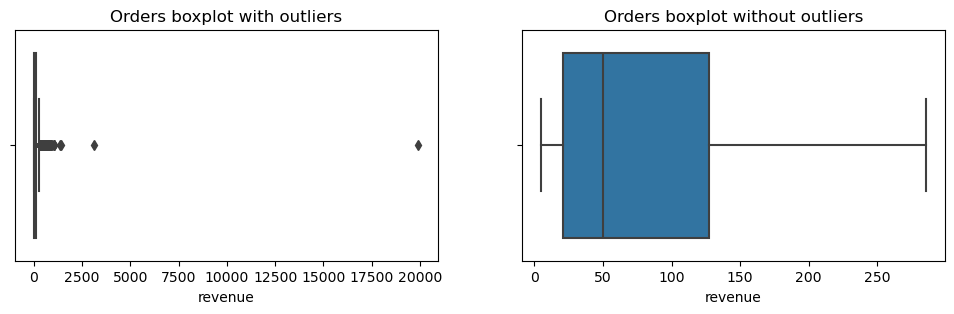

---------------------------------------
min border: -138
max border: 286
The outliers are considered to be values below -138 and above 286


In [227]:
# checking outliers with by use of "1.5*IQR approach" (whiskers of boxplot). 
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
x_data = orders_df['revenue']
sns.boxplot(x=x_data, showfliers=True, ax=axes[0]).set(title='Orders boxplot with outliers')
sns.boxplot(x=x_data, showfliers=False, ax=axes[1]).set(title='Orders boxplot without outliers')
plt.show();

# calculating and displaying the IQR and outlier borders
Q1 = round(x_data.quantile(0.25))
Q3 = round(x_data.quantile(0.75))
IQR = Q3-Q1
min_iqr=Q1-round(1.5*IQR) 
max_iqr=Q3+round(1.5*IQR)

print('---------------------------------------')
print('min border:',min_iqr)
print('max border:',max_iqr)
print('The outliers are considered to be values below',min_iqr, "and above",max_iqr);

"1.5*IQR approach" recommends us to treat all cases with order prices above 286 as outliers.

The presence of outliers could significantly affect our next analysis, potentially skewing the results and influencing the overall conclusions we draw.

In this case, it seems prudent to follow the most accurate approach and focus on removing only the 2 most outstanding outliers—those with extremely high values—that are clearly visible on the scatter plot above. Despite the dataset not being very large, eliminating all orders above certain thresholds (e.g., 286 or 830) as recommended by different approaches might lead to the loss of valuable data and insights that could be present in these outlier cases.

To ensure a comprehensive understanding of the data's characteristics, we will create a new dataframe for the filtered data, allowing us to compare the results of our analysis between the original data and the filtered data.

In [230]:
# creating a new dataframe for the filtered data (without outliers)
orders_df_filtered = orders_df.query('revenue <= 2500')

In [231]:
# checking result
orders_df_filtered

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A


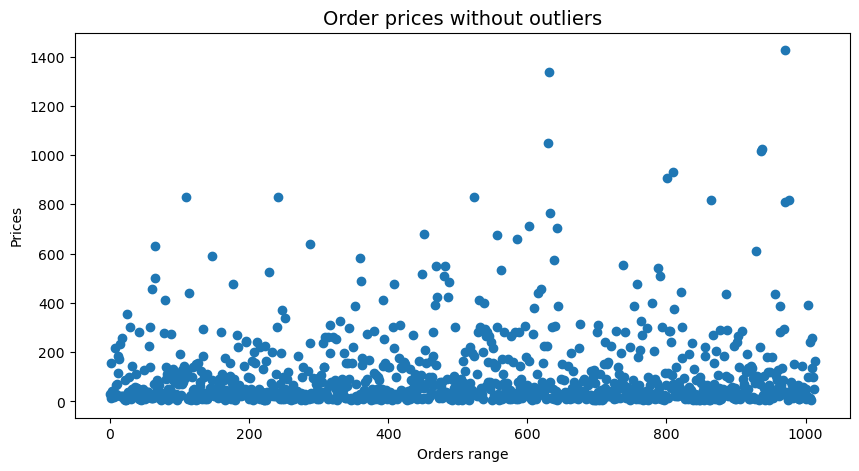

In [232]:
# plotting a scatter plot а the of orders prices on filtered data

plt.figure(figsize=(10, 5)) 
plt.title('Order prices without outliers',fontsize=14)

x_values = pd.Series(range(0, len(orders_df_filtered)))
plt.scatter(x_values, orders_df_filtered['revenue'])

plt.xlabel('Orders range')
plt.ylabel('Prices');

From the scatter plot with filtered data, it seems that treating just two extreme values as outliers was the right decision. Removing only these extreme values helped manage the impact of outliers while retaining valuable data.

### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. 

Let's establish our hypotheses:
- null Hypothesis (H0): there are no differences in conversion between the groups.
- alternative Hypothesis (H1): we lack sufficient evidence to conclude that there are no differences in conversion\* between the groups.

\*Later on, we will use the same formulations for the null and alternative hypotheses, but the parameter under study could be different.

In [236]:
# cheking the datasets we are going to operate with
orders_df.sample(5)
visits_df.sample(5)

,transaction_id,visitor_id,date,revenue,group
1145,3768600702,3320079367,2019-08-13,80.4,B
101,3847160695,1830791924,2019-08-01,40.2,A
103,2951399376,2019355024,2019-08-01,40.2,B
541,2425764900,3713138051,2019-08-20,40.2,B
705,2541328114,1426761187,2019-08-07,180.8,A


,date,group,visits
56,2019-08-26,B,676
2,2019-08-03,A,507
8,2019-08-09,A,617
26,2019-08-27,A,711
25,2019-08-26,A,722


We are comparing the performance of two groups using two different approaches:

- the first approach involves checking total conversion rates, treating visits as trials and orders as successes. We could compare the proportions of successes/trials for both groups using the z-value and the appropriate p-value.

- in the second approach, we could focus on comparing the average daily numbers in each group. Depending on the normality of the data sets, we could either use a t-test for independent samples if the data is normally distributed, or the Mann-Whitney U test if the data does not meet the assumptions of normality. Both tests would check whether there is a statistically significant difference in the datasets.

For the current case we would rather choose the second approach for its flexibility in handling normal and non-normal data sets.

In [238]:
# create the variables orders_by_users_a and orders_by_users_b to store the columns ['user_id', 'orders'] for each group
orders_by_users_a = (orders_df[orders_df['group']=='A'].groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique}) # indicating the number of orders made (for users with at least one order)
                 ) 
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (orders_df[orders_df['group']=='B'].groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique}) # indicating the number of orders made (for users with at least one order)
                 )
orders_by_users_b.columns = ['user_id', 'orders']  

In [239]:
# cheking result
orders_by_users_a.sample(3)
orders_by_users_b.sample(3)

,user_id,orders
203,2041539477,1
9,138252163,1
93,926057494,1


,user_id,orders
310,2445878741,1
371,2953427180,1
345,2710492161,1


In [240]:
# Declaring the variables sample_a and sample_b, with users from different groups and corresponding numbers of orders. 
# Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.

sample_a = pd.concat(
    [
    orders_by_users_a['orders'],pd.Series(
            0,index = np.arange(
                visits_df[visits_df['group'] == 'A']['visits'].sum() - len(orders_by_users_a['orders'])
            ), name ='orders'
        )
    ],axis=0
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],pd.Series(
            0,index = np.arange(
                visits_df[visits_df['group'] == 'B']['visits'].sum() - len(orders_by_users_b['orders'])
            ), name ='orders'
        )
    ],axis=0
)

In [241]:
# cheking result
sample_a
sample_b

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

In [242]:
# creating a function that compares two samples' means using either a t-test (if the data is approximately normal) 
# or a Mann-Whitney U test (if the data is non-normal) and prints the p-value along with the test result.

def testing_average(sample1, sample2, alpha=0.05):
    """
    Perform a hypothesis test to compare the means of two samples.

    Parameters:
        - sample1 (array-like): First sample data.
        - sample2 (array-like): Second sample data.
        - alpha (float): Significance level (default is 0.05).

    Returns:
        None. Prints the result of the hypothesis test.
    """

    # Checking for normality in both samples using Shapiro-Wilk test
    stat1, p1_norm = stats.shapiro(sample1)
    stat2, p2_norm = stats.shapiro(sample2)

    if p1_norm > alpha and p2_norm > alpha:
        # If both samples are normal, perform a t-test
        # Also check the equality of variances using Levene's test
        statslev, p_levene = stats.levene(sample1, sample2)

        if p_levene < alpha:
            # Variances are not equal, use Welch's t-test (unequal variances)
            stat_t, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)
            test_choiсe = 'Welch\'s t-test performed (as both samples are normal but variances are not equal)'
        else:
            # Variances are equal, use Student's t-test (equal variances)
            stat_t, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)
            test_choiсe = 't-test performed (as both samples are normal and variances are equal)'            
    else:
        # If one or both samples are not normal, perform a Mann-Whitney U test (non-parametric)
        stat_t, p_value = stats.mannwhitneyu(sample1, sample2)
        test_choiсe = 'Mann-Whitney U test performed (as one or both samples are not normal)'
    
    print(test_choiсe)
    print('-'*14)
    print(f'P-value: {p_value:.3f}')
    if p_value < alpha:
        print('Reject the null hypothesis (H0): there are significant differences between the groups.')
    else:
        print('Fail to reject the null hypothesis (H0): there is no significant evidence of differences between the groups.')
    
    # calculating relative growth for the sample2
    relative_growth_for_sample2 = (sample2.mean()/sample1.mean()-1)*100
   
    print(f'Relative growth for the sample2: {relative_growth_for_sample2:.1f}%') 

In [243]:
# running the 'testing_average' function
testing_average(sample_a, sample_b, alpha=0.05)

Mann-Whitney U test performed (as one or both samples are not normal)
--------------
P-value: 0.011
Reject the null hypothesis (H0): there are significant differences between the groups.
Relative growth for the sample2: 16.0%


- there is a statistically significant difference between groups A and B based on the raw data, as evidenced by the p-value being lower than the significance level.

- additionally, the relative growth of group B is substantial, with a notable increase of 16%.

### 10. Find the statistical significance of the difference in average order size between the groups using the raw data.

In [246]:
# running the 'testing_average' function
testing_average(
    orders_df[orders_df['group'] == 'A']['revenue'],
    orders_df[orders_df['group'] == 'B']['revenue'], 
    alpha=0.05
)

Mann-Whitney U test performed (as one or both samples are not normal)
--------------
P-value: 0.862
Fail to reject the null hypothesis (H0): there is no significant evidence of differences between the groups.
Relative growth for the sample2: 27.8%


- the p-value of 0.431 suggests that we fail to reject the null hypothesis (H0). This indicates that the data does not provide sufficient evidence to support the claim of significant differences between the groups. As a result, we do not have strong support for the idea that the groups are truly different.

- the relative growth of 27.8% in average revenue for group B compared to group A could be influenced by outliers present in the original dataset. We will further investigate this assumption in subsequent steps. One way to validate this is by using the median instead of mean values while calculating the relative growth between the datasets. The median is less affected by extreme values and works better when dealing with data containing significant outliers and non-normal distributions.

In [248]:
# calculating relative growth for the sample2 by use of median values instead of mean
(
    orders_df[orders_df['group'] == 'B']['revenue'].median()
    /orders_df[orders_df['group'] == 'A']['revenue'].median()
    -1
) * 100

-8.383233532934142

As expected, when using the median instead of the mean, we observe a negative growth - an 8.4% decline in average revenue for group B compared to group A. This aligns with our earlier assumption that outliers in the original dataset were influencing the mean and leading to an overestimated relative growth.

### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data.

In [251]:
# create the variables orders_by_users_a_filtered and orders_by_users_b_filtered to store the columns ['user_id', 'orders'] for each group
orders_by_users_a_filtered = (orders_df_filtered[orders_df_filtered['group']=='A'].groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique}) # indicating the number of orders made (for users with at least one order)
                 ) 
orders_by_users_a_filtered.columns = ['user_id', 'orders']

orders_by_users_b_filtered = (orders_df_filtered[orders_df_filtered['group']=='B'].groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique}) # indicating the number of orders made (for users with at least one order)
                 )
orders_by_users_b_filtered.columns = ['user_id', 'orders']  

In [252]:
# Declaring the variables sample_a and sample_b, with users from different groups and corresponding numbers of orders. 
# Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.

sample_a_filtered = pd.concat(
    [
        orders_by_users_a_filtered['orders'],pd.Series(
            0,index = np.arange(
                visits_df[visits_df['group'] == 'A']['visits'].sum() - len(orders_by_users_a_filtered['orders'])
            ),name ='orders'
        )
    ],axis=0
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b_filtered['orders'],pd.Series(
            0,index = np.arange(
                visits_df[visits_df['group'] == 'B']['visits'].sum() - len(orders_by_users_b_filtered['orders'])
            ),name ='orders'
        )
    ],axis=0
)

In [253]:
# running the 'testing_average' function
testing_average(sample_a_filtered, sample_b_filtered, alpha=0.05)

Mann-Whitney U test performed (as one or both samples are not normal)
--------------
P-value: 0.013
Reject the null hypothesis (H0): there are significant differences between the groups.
Relative growth for the sample2: 15.6%


- the result of studying the difference in conversion between the groups is the same for filtered and raw data: there is a statistically significant difference between groups A and B based on the raw data, as evidenced by the p-value being lower than the significance level.

- the p-value and relative growth of conversion between the groups remain almost the same.

### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data.

In [256]:
# running the 'testing_average' function
testing_average(
    orders_df_filtered[orders_df_filtered['group'] == 'A']['revenue'],
    orders_df_filtered[orders_df_filtered['group'] == 'B']['revenue'], 
    alpha=0.05
)

Mann-Whitney U test performed (as one or both samples are not normal)
--------------
P-value: 0.784
Fail to reject the null hypothesis (H0): there is no significant evidence of differences between the groups.
Relative growth for the sample2: -8.8%


The result of studying the difference in average order size between the groups is the same for filtered and raw data: we fail to reject the null hypothesis (H0). We do not have strong support for the idea that the groups are truly different.

The negative growth - an 8.8% decline in average order size for group B compared to group A is totally opposite to what we saw in the case of raw data (27.8% growth). And it perfectly matches with our small investigation - a test of the same parameter on the raw data but with the use of the median instead of the mean while calculating relative growth (we saw there -8.4% decline).

### 13. Make a decision based on the test results: 
- Stop the test, consider one of the groups the leader.
- Stop the test, conclude that there is no difference between the groups.
- Continue the test.

For answering this question, let's first visualize key metrics of A and B groups using filtered data (without major outliers in B group):
- cumulative revenue 
- relative difference in average order size between the groups
- conversion

#### Cumulative revenue, filtered data

In [261]:
# building an array with unique paired date-group values. FILTERED DATA. 
#dates_groups_filtered = orders_df_filtered[['date','group']].drop_duplicates()

In [262]:
# Getting aggregated cumulative daily data on orders. FILTERED DATA.

orders_aggregated_filtered = dates_groups.apply(
    lambda x: orders_df_filtered[
        np.logical_and(            
            orders_df_filtered['date'] <= x['date'], # the rows of the orders_cleaned_df where the date is less than or equal to the date of the dates_groups element
            orders_df_filtered['group'] == x['group'] # the test group is the same as in dates_groups
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [263]:
# merging the two tables into one and giving its columns descriptive names. FILTERED DATA.
cumulative_data_filtered = orders_aggregated_filtered.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [264]:
# dataframe with cumulative orders and cumulative revenue by day, group A. FILTERED DATA.
cumulative_revenue_a_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='A'][['date','revenue', 'orders']]

# dataframe with cumulative orders and cumulative revenue by day, group B. FILTERED DATA.
cumulative_revenue_b_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='B'][['date','revenue', 'orders']]

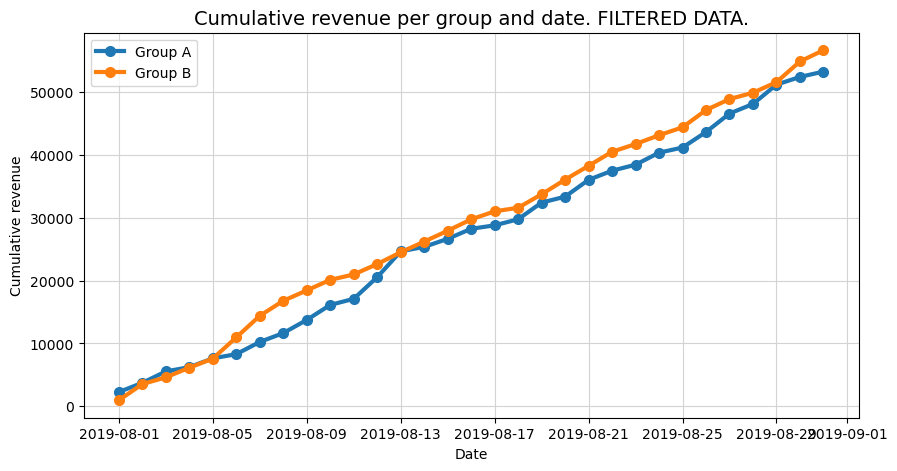

In [265]:
# plotting cumulative revenue graphs by day and A/B test group. FILTERED DATA.

plt.figure(figsize=(10, 5))
plt.title('Cumulative revenue per group and date. FILTERED DATA.',fontsize=14)

# Plotting the group A revenue graph 
plt.plot(cumulative_revenue_a_filtered['date'], cumulative_revenue_a_filtered['revenue'], 
         linewidth=3, marker='o', markersize=7, label='Group A')

# Plotting the group B revenue graph 
plt.plot(cumulative_revenue_b_filtered['date'], cumulative_revenue_b_filtered['revenue'], 
         linewidth=3, marker='o', markersize=7, label='Group B')

plt.grid(True, color='lightgray')
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.legend();

#### Relative difference in average order size between the groups, filtered data

In [267]:
# gathering the data into one dataframe. FILTERED DATA.
merged_cumulative_revenue_filtered = cumulative_revenue_a_filtered.merge(
    cumulative_revenue_b_filtered, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

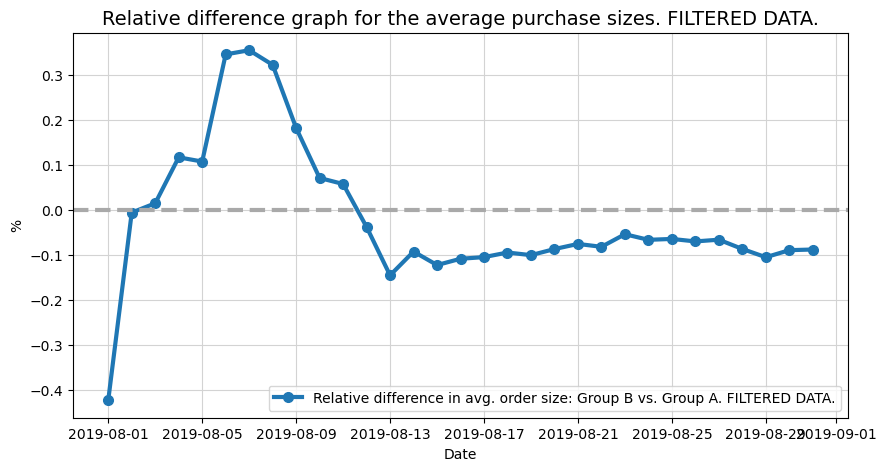

In [268]:
# plotting a relative difference graph for the average purchase sizes. FILTERED DATA.

plt.figure(figsize=(10, 5))
plt.title('Relative difference graph for the average purchase sizes. FILTERED DATA.',fontsize=14)

plt.plot(merged_cumulative_revenue_filtered['date'], 
         (merged_cumulative_revenue_filtered['revenue_b']/merged_cumulative_revenue_filtered['orders_b'])
         /(merged_cumulative_revenue_filtered['revenue_a']/merged_cumulative_revenue_filtered['orders_a'])
         -1
        , label='Relative difference in avg. order size: Group B vs. Group A. FILTERED DATA.',
        linewidth=3, marker='o', markersize=7)

plt.xlabel('Date')
plt.ylabel('%')
plt.grid(True, color='lightgray')

# adding the X axis
plt.axhline(y=0, color='darkgrey', linewidth=3, linestyle='--')
plt.legend(); 

#### Conversion, filtered data

In [270]:
# calculating cumulative conversion. FILTERED DATA.
cumulative_data_filtered['conversion'] = cumulative_data_filtered['orders']/cumulative_data_filtered['visitors']

# selecting data on group A  and B
cumulative_data_a_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='A']
cumulative_data_b_filtered = cumulative_data_filtered[cumulative_data_filtered['group']=='B']

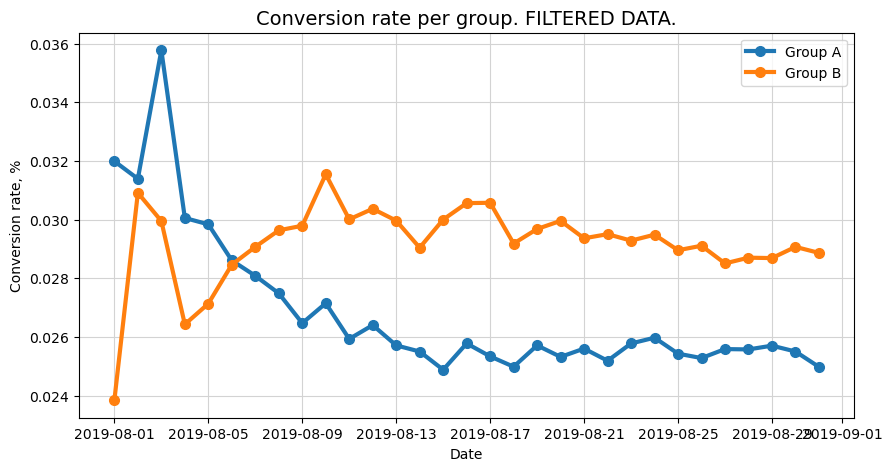

In [271]:
# Plotting a conversion rate graph for the average purchase sizes. FILTERED DATA.
plt.figure(figsize=(10, 5))
plt.title('Conversion rate per group. FILTERED DATA.',fontsize=14)

# Plotting the group A cumulative conversion
plt.plot(cumulative_data_a_filtered['date'], cumulative_data_a_filtered['conversion'], 
         linewidth=3, marker='o', markersize=7, label='Group A')

# Plotting the group B cumulative conversion
plt.plot(cumulative_data_b_filtered['date'], cumulative_data_b_filtered['conversion'], 
         linewidth=3, marker='o', markersize=7, label='Group B')

plt.grid(True, color='lightgray')
plt.xlabel('Date')
plt.ylabel('Conversion rate, %')
plt.legend();

#### Let's summarize our observations.
Here we will display the key metrics that we investigated mostly visualy while comparing A and B groups. 

We will display only **group B against group A**. And put the following marks: 
- "++" if we see that metric of group B is much better, 
- "+" if metric of group B is slightly better, 
- "--" if metric of group B is much weaker,
- "-" if metric of group B is slightly weaker

|Metric / Group| B|B, filtered data|
|---|---|---|
|Cumulative revenue|++|+|
|Av. order size|++|-|
|Conversion rate|++|++|

As we see from the table above **B group has better cumulative revenue and conversation rates for both filtered and non-filtered data. However, when considering filtered data without outliers, the average order size decreases compared to Group A**. It seems like the feature introduced for Group B has made the purchase decision easier, resulting in an improved conversion rate, but it has slightly decreased the overall order value. Nevertheless, **the cumulative revenue has seen an increase**, though not dramatically.

####  Let's summarize our observations on hypothesis testing
|Testing Metric| Data type|Test Result|Relative Growth of Metric: Group B comparing to Group A|
|:---|:---|:---|:---|
|<strong>Difference in conversion</strong> |raw|<font color="#8B0000"> <strong>Reject H0: </strong> differences between the groups are significant</font|16%|
|<strong>Difference in conversion</strong> |filtered|<font color="#8B0000"><strong>Reject H0: </strong> differences between the groups are significant</font>|16%|
|||||
|||||
|<strong>Difference in average order size</strong>  |raw|<font color="green"><strong>Failed to reject H0:</strong> no significant evidence of differences between the groups</font>|28%|
|<strong>Difference in average order size </strong> |filtered|<font color="green"><strong>Failed to reject H0: </strong> no significant evidence of differences between the groups</font>|-9%|

####  Overal conclusions

Our observations on the graphs and hypothesis testing match quite well. The minor difference is that while analyzing graphs, we can see that the average order size decreased for group B (with filtered data without outliers). However, hypothesis testing didn't show a significant difference in average order sizes between group B and group A. Most likely, this is due to the low accuracy of p-value measurements on large datasets like ours (as indicated by the notice received during the Mann-Whitney U tests).

Nevertheless, we have two factors that lead us to **make a decision to stop the test and consider group B as the leader**:

- we observe a significant conversion improvement for group B, and more importantly, a positive trend in cumulative revenue (a key metric). Even the slight decrease in the average order value does not significantly affect the overall picture.
- the figures stabilized by the middle of the test, allowing us to treat the outcomes as stable.